## 1、SVC核函数

### 1.1导包

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 1.2加载数据

In [5]:
x,y = datasets.load_wine(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(142, 13)

(36, 13)

(142,)

(36,)

### 1.3建模

#### 线性linear

In [7]:
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
score = accuracy_score(y_test,y_pred)
print('使用核函数为linear，得分是:',score)

使用核函数为linear，得分是: 0.9444444444444444


In [11]:
# 3种类别，三分类问题 
# 13个特征、属性，所以系数13个
w_ = svc.coef_
display(w_.shape)

(3, 13)

In [12]:
#三个方程三个截距
b_ = svc.intercept_
display(b_.shape)

(3,)

#### poly多项式 （方程幂次大于1的） 非线性

In [14]:
# 升维，数据由少变多
svc = SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
score = accuracy_score(y_test,y_pred)
print('使用核函数为poly，得分是:',score)

使用核函数为poly，得分是: 0.75


#### rbf高斯分布 非线性

In [18]:
#默认，一般这种核函数效果好，很多特征，属于正态分布
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
score = accuracy_score(y_test,y_pred)
print('使用核函数为rbf，得分是:',score)

使用核函数为rbf，得分是: 0.8055555555555556


#### sigmoid核函数

In [17]:
svc = SVC(kernel='sigmoid')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
score = accuracy_score(y_test,y_pred)
print('使用核函数为sigmoid，得分是:',score)

使用核函数为sigmoid，得分是: 0.08333333333333333


## 2、非线性核函数

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### 2.1创建数据

(100, 2)

(100,)

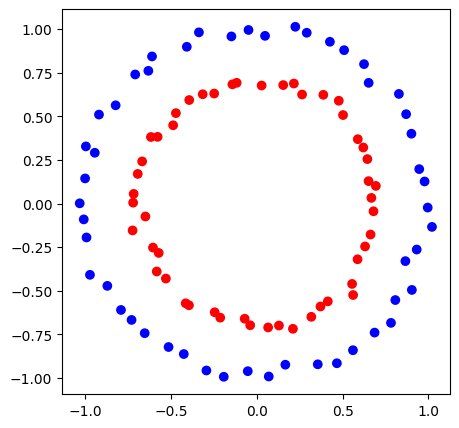

In [32]:

x,y = datasets.make_circles(n_samples=100,factor=0.7)
x += np.random.randn(100,2)*0.03
display(x.shape,y.shape)
plt.figure(figsize=(5,5))
#设置颜色
cmap = ListedColormap(colors=['blue','red'])
plt.scatter(x[:,0],x[:,1],c=y,cmap=cmap)

#### 2.2线性核函数

In [35]:
svc = SVC(kernel='linear')
svc.fit(x,y)
score = svc.score(x,y)
score

0.51

#### 2.3 多项式poly（升维）

In [38]:
svc = SVC(kernel='poly',degree=2)
svc.fit(x,y)
score = svc.score(x,y)
score

1.0

#### 2.4 rbf高斯核函数

In [39]:
svc = SVC(kernel='rbf')
svc.fit(x,y)
score = svc.score(x,y)
score

1.0

## 3、支持向量机回归问题

In [45]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

### 创建数据

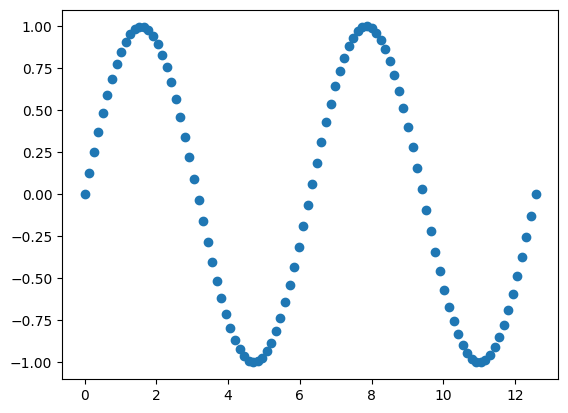

In [53]:
x = np.linspace(0,2*np.pi*2,100).reshape(-1,1)
y = np.sin(x)
plt.scatter(x,y)

### 建模

#### 线性核函数

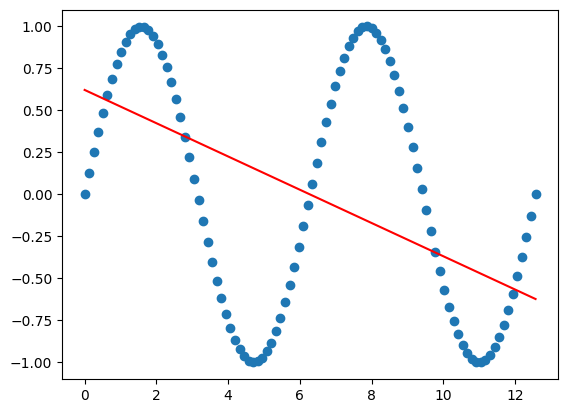

In [54]:
svr = SVR(kernel='linear')
svr.fit(x,y.ravel())
y_ = svr.predict(x)
plt.scatter(x,y)
plt.plot(x,y_,color='red')

#### poly多项式核函数

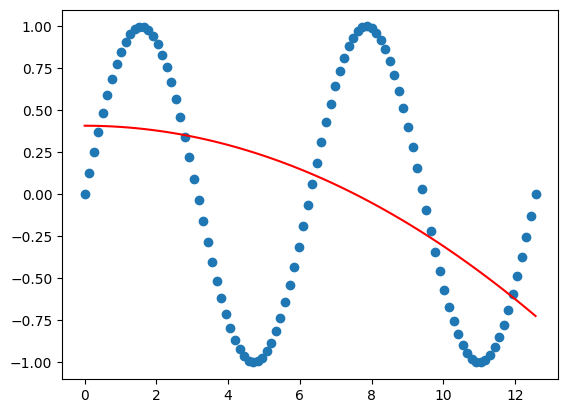

In [55]:
svr = SVR(kernel='poly',degree=2)
svr.fit(x,y.ravel())
y_ = svr.predict(x)
plt.scatter(x,y)
plt.plot(x,y_,color='red')

#### rbf径向基（高斯核函数）

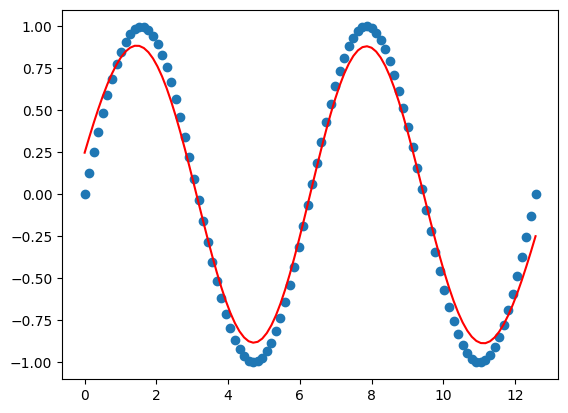

In [57]:
#分类的情况，正态分布效果好
#回归的情况，正弦这种上下的效果好
svr = SVR(kernel='rbf') 
svr.fit(x,y.ravel())
y_ = svr.predict(x)
plt.scatter(x,y)
plt.plot(x,y_,color='red')

## 4、天猫双十一销量数据预测

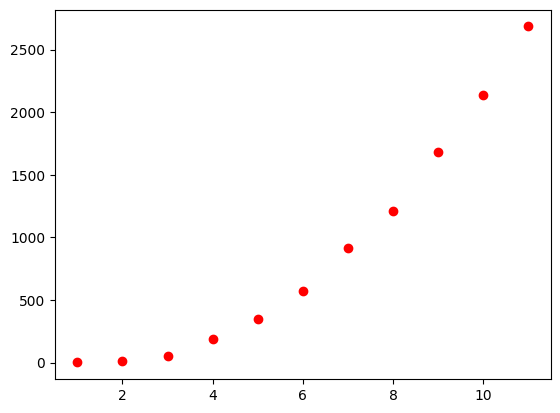

In [59]:
x = np.arange(2009,2020) - 2008
y = np.array([0.5,9.36,52,191,350,571,912,1207,1682,2135,2684])
plt.scatter(x,y,color='red')

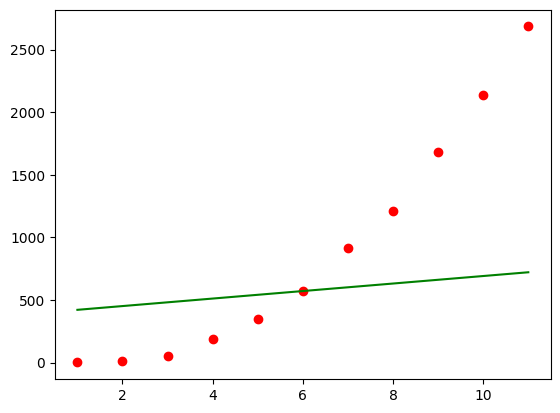

In [67]:
svr = SVR(kernel='linear')
svr.fit(x.reshape(-1,1),y)

x_test = np.linspace(2009,2019,100).reshape(-1,1)-2008

y_pred = svr.predict(x_test)
plt.scatter(x,y,color='red')
plt.plot(x_test,y_pred,color='green')

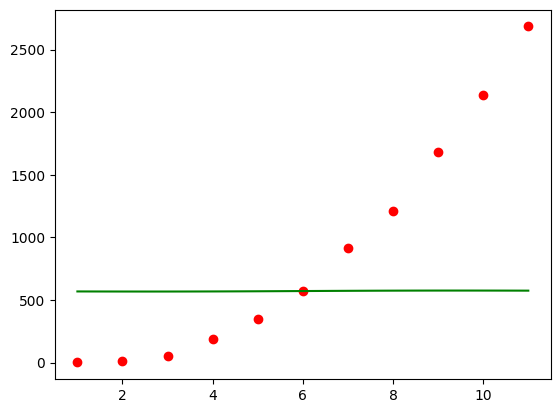

In [68]:
svr = SVR(kernel='rbf')
svr.fit(x.reshape(-1,1),y)

x_test = np.linspace(2009,2019,100).reshape(-1,1)-2008

y_pred = svr.predict(x_test)
plt.scatter(x,y,color='red')
plt.plot(x_test,y_pred,color='green')

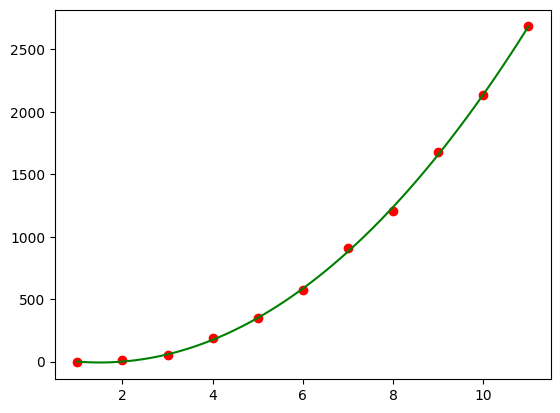

In [71]:
svr = SVR(kernel='poly',coef0=200)
svr.fit(x.reshape(-1,1),y)

x_test = np.linspace(2009,2019,100).reshape(-1,1)-2008

y_pred = svr.predict(x_test)
plt.scatter(x,y,color='red')
plt.plot(x_test,y_pred,color='green')